In [1]:
import pandas as pd
import numpy as np
import os
import glob
import matplotlib.pylab as plt
import progressbar

np.random.seed(42)

In [2]:
# translate SNANA types
types_names = {90:'Ia', 67: '91bg', 52:'Iax', 42:'II', 62:'Ibc', 
               95: 'SLSN', 15:'TDE', 64:'KN', 88:'AGN', 92:'RRL', 65:'M-dwarf',
               16:'EB',53:'Mira', 6:'MicroL', 991:'MicroLB', 992:'ILOT', 
               993:'CART', 994:'PISN',995:'MLString'}

SNANA_types = {90:11, 62:{1:3, 2:13}, 42:{1:2, 2:12, 3:14},
               67:41, 52:43, 64:51, 95:60, 994:61, 992:62,
               993:63, 15:64, 88:70, 92:80, 65:81, 16:83,
               53:84, 991:90, 6:{1:91, 2:93}}

SNANA_names = {11: 'Ia', 3:'Ibc', 13: 'Ibc', 2:'II', 12:'II', 14:'II',
               41: '91bg', 43:'Iax', 51:'KN', 60:'SLSN', 61:'PISN', 62:'ILOT',
               63:'CART', 64:'TDE', 70:'AGN', 80:'RRL', 81:'M-dwarf', 83:'EB',
               84:'Mira', 90:'MicroLB', 91:'MicroL', 93:'MicroL'}

In [3]:
# this needs to be run just once
output_root = '/media/RESSPECT/data/PLAsTiCC/for_metrics/final_data3/'

for field in ['DDF', 'WFD']:
    for version in range(20):
        for nobjs in [1500, 3000, 6000]:

            # create directory structure
            dir_list = [output_root + field + '/',
                        output_root + field + '/results/v' + str(version) + '/' + str(nobjs) + '/',
                        output_root + field + '/results/v' + str(version) + '/' + str(nobjs) + '/cospar/',
                        output_root + field + '/results/v' + str(version) + '/' + str(nobjs) + '/fitres/', 
                        output_root + field + '/results/v' + str(version) + '/' + str(nobjs) + '/M0DIF/',
                        output_root + field + '/results/v' + str(version) + '/' + str(nobjs) + '/posteriors/',
                        output_root + field + '/results/v' + str(version) + '/' + str(nobjs) + '/posteriors/csv/',
                        output_root + field + '/results/v' + str(version) + '/' + str(nobjs) + '/posteriors/pkl',
                        output_root + field + '/results/v' + str(version) + '/' + str(nobjs) + '/posteriors/trace',
                        output_root + field + '/results/v' + str(version) + '/' + str(nobjs) + '/samples/',
                        output_root + field + '/results/v' + str(version) + '/' + str(nobjs) + '/stan_input/',
                        output_root + field + '/results/v' + str(version) +'/' + str(nobjs) +  '/stan_summary/',
                      ]

            for name in dir_list:
                if not os.path.isdir(name):
                    os.makedirs(name)


In [4]:
# read zenodo metadata
fname = '/media/RESSPECT/data/PLAsTiCC/PLAsTiCC_zenodo/plasticc_test_metadata.csv'
test_metadata = pd.read_csv(fname)

# separate fields
ddf_flag = test_metadata['ddf_bool'].values == 1
ids_ddf = test_metadata['object_id'].values[ddf_flag]
ids_wfd = test_metadata['object_id'].values[~ddf_flag]

# Create perfect samples

In [5]:
v = '1'
field = 'DDF'
nobjs = 1500
data_dir = output_root + field + '/results/v' + v + '/' + str(nobjs) + '/samples/'

## For DDF

In [6]:
# read all Ias in DDF
salt2_Ia_DDF = pd.read_csv(output_root + '/' + field + '/SALT2_fit/Ia/fitres/master_fitres_1.fitres', 
                           comment='#', delim_whitespace=True)
salt2_Ia_DDF['zHD'] = salt2_Ia_DDF['SIM_ZCMB']          # requirement of so SALT2mu can work

# choose number of versions of the same sample to generate
for i in range(1, 2):
    perfect_Ia_DDF = salt2_Ia_DDF.sample(n=nobjs, replace=False)
    perfect_Ia_DDF.to_csv(data_dir + 'perfect' +  str(nobjs) + '.csv', sep=' ', index=False)

In [10]:
np.unique(salt2_Ia_DDF['SIM_TYPE_INDEX'].values)

array([11])

In [11]:
salt2_Ia_DDF.shape

(8613, 56)

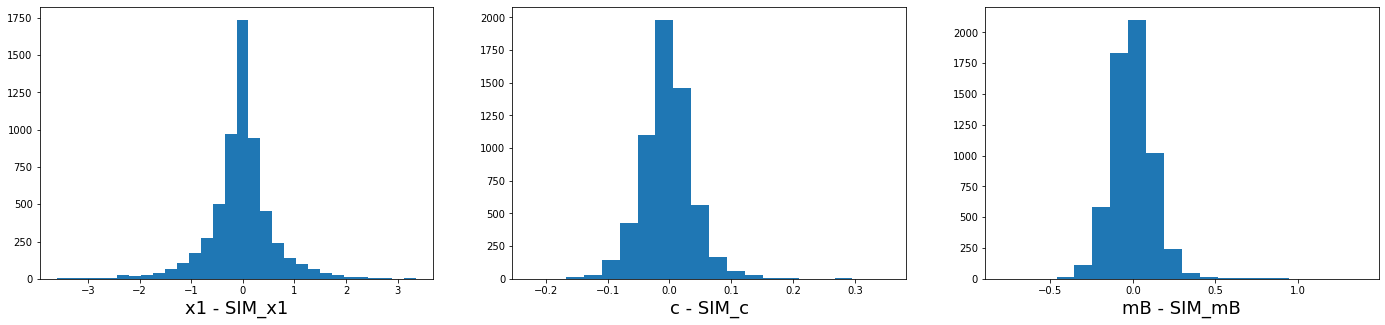

In [12]:
plt.figure(figsize=(24,5))
plt.subplot(1,3,1)
plt.hist(perfect_Ia_DDF['x1'] - perfect_Ia_DDF['SIM_x1'], bins=30)
plt.xlabel('x1 - SIM_x1', fontsize=18)

plt.subplot(1,3,2)
plt.hist(perfect_Ia_DDF['c'] - perfect_Ia_DDF['SIM_c'], bins=20 )
plt.xlabel('c - SIM_c', fontsize=18)

mask = perfect_Ia_DDF['mB'] - perfect_Ia_DDF['SIM_mB'] < 2
plt.subplot(1,3,3)
plt.hist(perfect_Ia_DDF['mB'][mask] - perfect_Ia_DDF['SIM_mB'][mask], bins=20)
plt.xlabel('mB - SIM_mB', fontsize=18)
plt.show()

## For WFD

In [7]:
# read all Ias in WFD
fnames_Ia = glob.glob(output_root + 'WFD/SALT2_fit/Ia/fitres/master_fitres_*.fitres')

salt2_WFD = []

for name in fnames_Ia:
    try:
        fitres_temp = pd.read_csv(name, delim_whitespace=True, 
                                  comment='#')
        fitres_temp['zHD'] = fitres_temp['SIM_ZCMB']
        salt2_WFD.append(fitres_temp)
    except ValueError:
        pass
    else:
        pass

salt2_Ia_WFD = pd.concat(salt2_WFD, ignore_index=True)

# choose number of versions of the same sample to generate
for i in range(1,2):
    perfect_Ia_WFD = salt2_Ia_WFD.sample(n=nobjs, replace=False)
    mask = perfect_Ia_WFD['mB'] - perfect_Ia_WFD['SIM_mB'] < 10000
    perfect_Ia_WFD.to_csv(output_root + 'WFD/results/v' + str(i) + '/' + str(nobjs) + '/samples/perfect' + \
                          str(nobjs) + '.csv', sep=' ', index=False)

In [7]:
np.unique(salt2_Ia_WFD['SIM_TYPE_INDEX'].values)

array([11])

In [8]:
salt2_Ia_WFD.shape

(999789, 56)

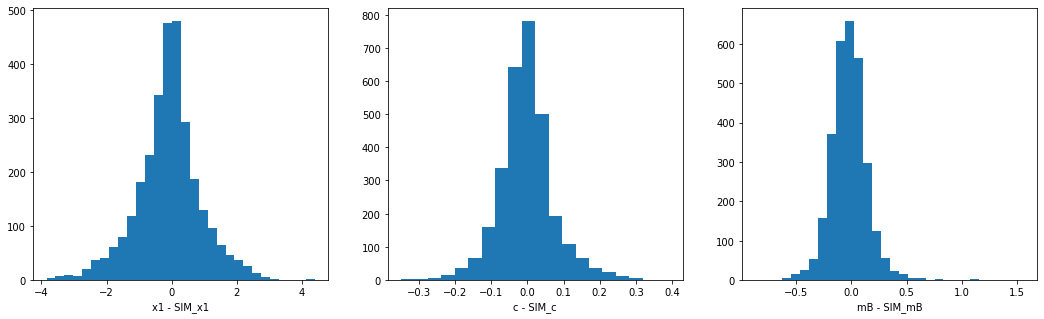

In [9]:
plt.figure(figsize=(18,5))
plt.subplot(1,3,1)
plt.hist(perfect_Ia_WFD['x1'] - perfect_Ia_WFD['SIM_x1'], bins=30)
plt.xlabel('x1 - SIM_x1')

plt.subplot(1,3,2)
plt.hist(perfect_Ia_WFD['c'] - perfect_Ia_WFD['SIM_c'], bins=20 )
plt.xlabel('c - SIM_c')

mask = perfect_Ia_WFD['mB'] - perfect_Ia_WFD['SIM_mB'] < 10000
plt.subplot(1,3,3)
plt.hist(perfect_Ia_WFD['mB'][mask] - perfect_Ia_WFD['SIM_mB'][mask], bins=30)
plt.xlabel('mB - SIM_mB')
#plt.savefig('dist_WFD_perfct3000.png')
plt.show()

# Create Random samples

## For DDF

In [8]:
# list of classes surviving SALT2 fit
surv_class_DDF = os.listdir(output_root + 'DDF/SALT2_fit/')

# read all SALT2 fit results for DDF
all_DDF = []

for obj_type in surv_class_DDF: 
    if obj_type == 'Ia':
        data_temp = pd.read_csv(output_root + 'DDF/SALT2_fit/' + \
                            obj_type + '/fitres/master_fitres_1.fitres', 
                            comment='#', delim_whitespace=True)
        data_temp['zHD'] = data_temp['SIM_ZCMB']
        data_temp.fillna(-99, inplace=True)
        all_DDF.append(data_temp)
        print(obj_type, np.unique(data_temp['SIM_TYPE_INDEX'].values), data_temp.shape[0])
        
    elif obj_type not in ['Ibc', 'II']:
        try:
            data_temp = pd.read_csv(output_root + 'DDF/SALT2_fit/' + \
                                    obj_type + '/fitres/master_fitres_1.fitres', 
                                    comment='#', delim_whitespace=True)
            data_temp['zHD'] = data_temp['SIM_ZCMB']
            data_temp.fillna(-99, inplace=True)
            all_DDF.append(data_temp)
            print(obj_type, np.unique(data_temp['SIM_TYPE_INDEX'].values), data_temp.shape[0])
        except:
            pass
        
    elif obj_type == 'Ibc':
        for subtype in ['13', '3']:
            data_temp = pd.read_csv(output_root + 'DDF/SALT2_fit/' + \
                                    obj_type + '/fitres/master_fitres_' + subtype \
                                    + '_1.fitres', 
                                    comment='#', delim_whitespace=True)
        
            data_temp['zHD'] = data_temp['SIM_ZCMB']
            data_temp.fillna(-99, inplace=True)
            all_DDF.append(data_temp)
            print(obj_type, np.unique(data_temp['SIM_TYPE_INDEX'].values), data_temp.shape[0])
    elif obj_type == 'II':
        for subtype in ['12', '14', '2']:
            data_temp = pd.read_csv(output_root + 'DDF/SALT2_fit/' + \
                                    obj_type + '/fitres/master_fitres_' + subtype \
                                    + '_1.fitres', 
                                    comment='#', delim_whitespace=True)
        
            data_temp['zHD'] = data_temp['SIM_ZCMB']
            data_temp.fillna(-99, inplace=True)
            all_DDF.append(data_temp)
            print(obj_type, np.unique(data_temp['SIM_TYPE_INDEX'].values), data_temp.shape[0])
    
all_surv_DDF = pd.concat(all_DDF, ignore_index=True)
all_surv_DDF.fillna(-99, inplace=True)

# choose number of versions of the same sample to generate
for i in range(1,2):
    random_DDF = all_surv_DDF.sample(n=nobjs, replace=False)
    random_DDF.to_csv(output_root + 'DDF/results/v' + str(i) + '/' + str(nobjs) + '/samples/random' + \
                      str(nobjs) + '.csv', sep=' ', index=False)

TDE [64] 1
91bg [41] 4
CART [63] 19
SLSN [60] 4
Ibc [13] 60
Ibc [3] 136
Ia [11] 8613
Iax [43] 362
AGN [70] 1
II [12] 350
II [14] 45
II [2] 633


In [18]:
snana_numbers_ddf, freq_ddf = np.unique(all_surv_DDF['SIM_TYPE_INDEX'].values, 
                                        return_counts=True)

for i in range(len(freq_ddf)):
    print(SNANA_names[snana_numbers_ddf[i]], '\t', freq_ddf[i], 
          '\t', 100*freq_ddf[i]/all_surv_DDF.shape[0])

II 	 633 	 6.188893234258897
Ibc 	 136 	 1.3296832225263981
Ia 	 8613 	 84.21001173249903
II 	 350 	 3.4219788815017598
Ibc 	 60 	 0.5866249511145875
II 	 45 	 0.43996871333594056
91bg 	 4 	 0.03910833007430583
Iax 	 362 	 3.539303871724677
SLSN 	 4 	 0.03910833007430583
CART 	 19 	 0.18576456785295267
TDE 	 1 	 0.009777082518576457
AGN 	 1 	 0.009777082518576457


In [19]:
# type II 
100*(freq_ddf[0] + freq_ddf[3] + freq_ddf[5])/all_surv_DDF.shape[0]

10.050840829096597

In [20]:
# type Ibc
100*(freq_ddf[1]+freq_ddf[4])/all_surv_DDF.shape[0]

1.9163081736409855

In [21]:
all_surv_DDF.shape

(10228, 111)

## For WFD

In [9]:
# list of classes surviving SALT2 fit
flist = glob.glob(output_root + 'WFD/SALT2_fit/*/fitres/master_fitres_*.fitres')

# read all SALT2 fit results for WFD
all_WFD = []
for name in flist:
    try:
        data_temp = pd.read_csv(name, comment='#', delim_whitespace=True)
        data_temp['zHD'] = data_temp['SIM_ZCMB']
        data_temp.fillna(-99, inplace=True)
        all_WFD.append(data_temp)
        
    except:
        pass
    
all_surv_WFD = pd.concat(all_WFD, ignore_index=True)
all_surv_WFD.fillna(-99, inplace=True)

# choose number of versions of the same sample to generate
v = 1

for i in range(1,2):
    random_WFD = all_surv_WFD.sample(n=nobjs, replace=False)
    random_WFD.to_csv(output_root + 'WFD/results/v' + str(i) + '/' + str(nobjs) + '/samples/random' + \
                      str(nobjs) + '.csv', sep=' ', index=False)

In [23]:
salt2_Ia_WFD.shape[0]/all_surv_WFD.shape[0]

0.913191923122241

In [24]:
snana_numbers_wfd, freq_wfd = np.unique(all_surv_WFD['SIM_TYPE_INDEX'].values, return_counts=True)

for i in range(len(freq_wfd)):
    print(SNANA_names[snana_numbers_wfd[i]], '\t', freq_wfd[i], '\t', 100*freq_wfd[i]/all_surv_WFD.shape[0])

II 	 39095 	 3.570877278552176
Ibc 	 6917 	 0.631788160525525
Ia 	 999789 	 91.3191923122241
II 	 28300 	 2.584878551810374
Ibc 	 4686 	 0.42801204571672835
II 	 4924 	 0.44975060032205944
91bg 	 308 	 0.028132247136310785
Iax 	 8993 	 0.8214068133014379
KN 	 1 	 9.133846472828176e-05
SLSN 	 503 	 0.04594324775832573
PISN 	 9 	 0.0008220461825545359
ILOT 	 22 	 0.002009446224022199
CART 	 1136 	 0.10376049593132809
AGN 	 146 	 0.013335415850329138


In [25]:
# type II
100*(freq_wfd[0]+ freq_wfd[3] + freq_wfd[5])/all_surv_WFD.shape[0]

6.605506430684609

In [26]:
# type Ibc
100*(freq_wfd[1] + freq_wfd[4])/all_surv_WFD.shape[0]

1.0598002062422534

In [27]:
all_surv_WFD.shape

(1094829, 109)

# Create Fiducial samples

## For DDF

In [10]:
# read results from avocado
fname_DDF = '/media/RESSPECT/data/PLAsTiCC/for_metrics/final_data/DDF/avocado/avocado_DDF.csv'
avocado_DDF = pd.read_csv(fname_DDF, names=['object_id','6','15','16','42','52','53','62','64','65','67','88',
                                           '90','92','95'], skiprows=1)

# determine final classification
class_final_DDF = []
for i in progressbar.progressbar(range(avocado_DDF.shape[0])):
    indx = np.argsort(avocado_DDF.iloc[i].values[1:])[-1]
    code = int(avocado_DDF.keys()[indx + 1])
    class_final_DDF.append(types_names[code])
class_final_DDF = np.array(class_final_DDF)

# get photometrically classified Ia
flag_class_Ia_DDF = class_final_DDF == 'Ia'
avocado_DDF_Ia = avocado_DDF[flag_class_Ia_DDF]

# get SALT2 fit for objs photometrically classified as Ia
avocado_DDF_Ia_fitres_flag = np.array([item in avocado_DDF_Ia['object_id'].values 
                                       for item in all_surv_DDF['CID'].values])
all_avocado_DDF_Ia = all_surv_DDF[avocado_DDF_Ia_fitres_flag]

# choose number of versions of the same sample to generate
for i in range(1,2):
    fiducial_DDF = all_avocado_DDF_Ia.sample(n=nobjs, replace=False)
    fiducial_DDF.to_csv(output_root + 'DDF/results/v' + str(i) + '/' + str(nobjs) + '/samples/fiducial' + \
                      str(nobjs) + '.csv', sep=' ', index=False)

100% (11898 of 11898) |##################| Elapsed Time: 0:00:01 Time:  0:00:01


## For WFD

In [11]:
# read results from avocado
fname_WFD =  '/media/RESSPECT/data/PLAsTiCC/for_metrics/final_data/WFD/avocado/avocado_WFD.csv'
avocado_WFD = pd.read_csv(fname_WFD, names=['object_id','6','15','16','42','52','53','62','64','65','67','88',
                                           '90','92','95'], skiprows=1)

# determine final classification
class_final_WFD = []
for i in progressbar.progressbar(range(avocado_WFD.shape[0])):
    indx = np.argsort(avocado_WFD.iloc[i].values[1:])[-1]
    code = int(avocado_WFD.keys()[indx + 1])
    class_final_WFD.append(types_names[code])
    
# get photometrically classified Ia
class_final_WFD = np.array(class_final_WFD)
flag_class_Ia_WFD = class_final_WFD == 'Ia'
avocado_WFD_Ia = avocado_WFD[flag_class_Ia_WFD]

# get SALT2 fit for objs photometrically classified as Ia
avocado_WFD_Ia_fitres_flag = np.array([item in avocado_WFD_Ia['object_id'].values 
                                       for item in all_surv_WFD['CID'].values])
all_avocado_WFD_Ia = all_surv_WFD[avocado_WFD_Ia_fitres_flag]

# choose number of versions of the same sample to generate
for i in range(1,2):
    fiducial_WFD = all_avocado_WFD_Ia.sample(n=nobjs, replace=False)
    fiducial_WFD.to_csv(output_root + 'WFD/results/v' + str(i) + '/' + str(nobjs) + '/samples/fiducial' + \
                      str(nobjs) + '.csv', sep=' ', index=False)

100% (1039135 of 1039135) |##############| Elapsed Time: 0:02:31 Time:  0:02:31


In [30]:
obj, freq = np.unique(fiducial_WFD['SIM_TYPE_INDEX'].values, return_counts=True)
for i in range(len(obj)):
    print(SNANA_names[obj[i]], '  --  ', freq[i]/fiducial_WFD.shape[0])

II   --   0.0095
Ibc   --   0.0005
Ia   --   0.9845
II   --   0.00016666666666666666
II   --   0.0018333333333333333
Iax   --   0.0035


# Create single contaminant samples

## For DDF

In [38]:
# levels of contamination
cont_DDF = {'II': [0.25, 0.1, 0.05, 0.02, 0.01],
            'Ibc': [0.05, 0.02, 0.01],
            'Iax': [0.1, 0.05, 0.02, 0.01]}

complete_names ={'II': 'SNII', 'Ibc': 'SNIbc', 'Iax': 'SNIax', 'CART':'CART',
                 '91bg':'SNIa-91bg', 'AGN':'AGN', 'SLSN':'SLSN'}

for i in range(10,20):
    for obj_class in ['II']:#list(cont_DDF.keys()):
        # read all contaminants surviving SALT2 fit
        if obj_class not in ['II', 'Ibc']:
            sample_cont = pd.read_csv(output_root + 'DDF/SALT2_fit/' + obj_class + '/fitres/master_fitres_1.fitres', comment='#',
                                  delim_whitespace=True)
        elif obj_class == 'Ibc':
            sample_cont_list = []
            for subset in  ['13', '3']:
                data_temp = pd.read_csv(output_root + 'DDF/SALT2_fit/' + \
                                        obj_class + '/fitres/master_fitres_' + subset \
                                        + '_1.fitres', 
                                        comment='#', delim_whitespace=True)
                sample_cont_list.append(data_temp)
                
            sample_cont = pd.concat(sample_cont_list, ignore_index=True) 
            
        elif obj_class == 'II':
            sample_cont_list = []
            for subset in ['12', '14', '2']:
                data_temp = pd.read_csv(output_root + 'DDF/SALT2_fit/' + \
                                        obj_class + '/fitres/master_fitres_' + subset \
                                        + '_1.fitres', 
                                        comment='#', delim_whitespace=True)
                
                sample_cont_list.append(data_temp)
                
            sample_cont = pd.concat(sample_cont_list, ignore_index=True) 
        
        sample_cont['zHD'] = sample_cont['SIM_ZCMB']
    
        for perc in cont_DDF[obj_class]:
            Ia_temp = salt2_Ia_DDF.sample(n=int((1 - perc) * nobjs), replace=False)
            cont_temp = sample_cont.sample(n=int(perc * nobjs), replace = False)
            sample_final = pd.concat([Ia_temp, cont_temp], ignore_index=True)
            sample_final.fillna(-99, inplace=True)
        
            if obj_class not in ['CART', 'SLSN']:
                sample_final.to_csv(output_root + 'DDF/results/v' + str(i)  + '/' + str(nobjs) + '/samples/' + str(int(100 - 100 * perc)) + \
                                    'SNIa' + str(int(100 * perc)) + complete_names[obj_class] + '.csv', 
                                     sep=' ', index=False)
            else:
                sample_final.to_csv(output_root + 'DDF/results/v' + str(i) + '/'+  str(nobjs) + '/samples/' + str(round(100 - 100 * perc, 1)) + \
                                    'SNIa' + str(round(100 * perc, 1)) + complete_names[obj_class] + '.csv', 
                                     sep=' ', index=False)

## For WFD

In [ ]:
# levels of contamination
cont_WFD = {'II': [0.25, 0.1, 0.05, 0.02, 0.01],
            'Ibc': [0.1, 0.05, 0.02, 0.01],
            'Iax': [0.25, 0.1, 0.05, 0.02, 0.01],
            'SLSN': [0.15, 0.10, 0.05, 0.02, 0.01],
            '91bg': [0.1, 0.05, 0.02, 0.01],
            'AGN': [0.02, 0.01],
            'CART': [0.01]}

complete_names ={'II': 'SNII', 'Ibc': 'SNIbc', 'Iax': 'SNIax', 'CART':'CART',
                 '91bg':'SNIa-91bg', 'AGN':'AGN', 'PISN':'PISN', 'ILOT':'ILOT', 'SLSN':'SLSN'}

for i in range(10,20):
    for obj_class in ['II']: #list(cont_WFD.keys()):
        # read all contaminants surviving SALT2 fit
        flist = glob.glob(output_root + 'WFD/SALT2_fit/' + obj_class + '/fitres/master_fitres_*.fitres')
        
        sample_cont = []
        for name in flist:
            
            try:
                temp_cont = pd.read_csv(name, comment='#', delim_whitespace=True)
                temp_cont['zHD'] = temp_cont['SIM_ZCMB']
                sample_cont.append(temp_cont)
                print(obj_class, perc, '  temp_cont.size = ', temp_cont.shape[0], '  ', 
                  str(np.unique(temp_cont['SIM_TYPE_INDEX'])) )
            except:
                pass
            
        if len(sample_cont) > 0:
            sample_cont2 = pd.concat(sample_cont, ignore_index=True)
            print(sample_cont2.shape)
    
            for perc in cont_WFD[obj_class]:     
                print(perc)
                Ia_temp2 = salt2_Ia_WFD.sample(n=int((1-perc)*nobjs), replace=False)
                cont_temp2 = sample_cont2.sample(n=int(perc*nobjs), replace = False)
                sample_final = pd.concat([Ia_temp2, cont_temp2], ignore_index=True)
                sample_final.fillna(-99, inplace=True)
                #if obj_class in ['Iax'] and perc in [0.01]:
                if True:
                    print(np.unique(sample_final['TYPE'].values, return_counts=True))
                    sample_final.to_csv(output_root + 'WFD/results/v' + str(i) + '/' + str(nobjs) + '/samples/' + str(int(100 - 100 * perc)) + \
                                       'SNIa' + str(int(100 * perc)) + complete_names[obj_class] + '.csv', 
                                    sep=' ', index=False)